In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

For this project we collected data from website : Carsdekho


In [2]:
#Loading the data collected from carsdekho
df1=pd.read_csv('cardekho.csv')

In [3]:
#Viewing top and bottom 5 rows
df1

,Unnamed: 0,car_type,location,brand,model,version,year,fuel_type,transmission_type,distance_driven,price
0,0,-,Chennai,Maruti,Ertiga,VDI,2012,Diesel,Manual,"64,523 kms",6.1 Lakh
1,1,-,Chennai,Maruti,Wagon R,AMT VXI,2018,Petrol,Automatic,"29,000 kms",5.15 Lakh
2,2,-,Chennai,Hyundai,Verna,CRDi 1.4 EX,2019,Diesel,Manual,"38,000 kms",9.55 Lakh
3,3,-,Chennai,Maruti,Alto,LXi,2006,Petrol,Manual,"91,500 kms",1.4 Lakh
4,4,-,Chennai,Ford,Ecosport,1.5 DV5 MT Titanium,2014,Diesel,Manual,"45,000 kms",6.25 Lakh
...,...,...,...,...,...,...,...,...,...,...,...
12065,12065,-,Ahmedabad,Maruti,SX4,VDI,2012,Diesel,Manual,"90,000 kms",2 Lakh
12066,12066,-,Ahmedabad,Maruti,Ertiga,LDI,2012,Diesel,Manual,"1,20,000 kms",3.75 Lakh
12067,12067,-,Ahmedabad,Mahindra,Quanto,C8,2013,Diesel,Manual,"1,40,000 kms",3.55 Lakh
12068,12068,-,Ahmedabad,Hyundai,Grand i10,1.2 Kappa Sportz Option AT,2018,Petrol,Automatic,"1,00,000 kms",5.5 Lakh


We can see there are 12070 rows and 11 columns. 
Column 1 is index, not required so we will drop

In [4]:
df1=df1.iloc[:,1:]
df1

,car_type,location,brand,model,version,year,fuel_type,transmission_type,distance_driven,price
0,-,Chennai,Maruti,Ertiga,VDI,2012,Diesel,Manual,"64,523 kms",6.1 Lakh
1,-,Chennai,Maruti,Wagon R,AMT VXI,2018,Petrol,Automatic,"29,000 kms",5.15 Lakh
2,-,Chennai,Hyundai,Verna,CRDi 1.4 EX,2019,Diesel,Manual,"38,000 kms",9.55 Lakh
3,-,Chennai,Maruti,Alto,LXi,2006,Petrol,Manual,"91,500 kms",1.4 Lakh
4,-,Chennai,Ford,Ecosport,1.5 DV5 MT Titanium,2014,Diesel,Manual,"45,000 kms",6.25 Lakh
...,...,...,...,...,...,...,...,...,...,...
12065,-,Ahmedabad,Maruti,SX4,VDI,2012,Diesel,Manual,"90,000 kms",2 Lakh
12066,-,Ahmedabad,Maruti,Ertiga,LDI,2012,Diesel,Manual,"1,20,000 kms",3.75 Lakh
12067,-,Ahmedabad,Mahindra,Quanto,C8,2013,Diesel,Manual,"1,40,000 kms",3.55 Lakh
12068,-,Ahmedabad,Hyundai,Grand i10,1.2 Kappa Sportz Option AT,2018,Petrol,Automatic,"1,00,000 kms",5.5 Lakh


In [5]:
#Splitted the data frame and considered the required part
df1['price']=df1['price'].str.split(' ',expand=True)[0]

In [6]:
df1['price']

0         6.1
1        5.15
2        9.55
3         1.4
4        6.25
         ... 
12065       2
12066    3.75
12067    3.55
12068     5.5
12069     4.5
Name: price, Length: 12070, dtype: object

In [7]:
#Splitted by space and removed kms
df1['distance_driven']=df1['distance_driven'].str.split(' ',expand=True)[0]

In [8]:
#replacing the , between numbers with ''
df1['distance_driven']=df1['distance_driven'].str.replace(',','')

In [9]:
#Let us check data types
df1.dtypes

car_type             object
location             object
brand                object
model                object
version              object
year                  int64
fuel_type            object
transmission_type    object
distance_driven      object
price                object
dtype: object

Still the distance_driven and price are in object. Let us change their data type

In [10]:
#Replaced the , with '' and divide with lakh
y=[]
x=df1['price'].str.split(expand=True)[0]
for i in x:
    if  ',' in i:
        temp=float(i.replace(',',''))
        convert=temp/100000
        y.append(convert)
    else :
        y.append(i)
df1['price']=y
df1['price']

0         6.1
1        5.15
2        9.55
3         1.4
4        6.25
         ... 
12065       2
12066    3.75
12067    3.55
12068     5.5
12069     4.5
Name: price, Length: 12070, dtype: object

In [11]:
#Now let us convert
df1['price']=pd.to_numeric(df1['price'])

Now it is converted to float type

In [12]:
#Simillarly let us convert the distance column
df1['distance_driven']=pd.to_numeric(df1['distance_driven'])

Now this is in int format

In [13]:
#Let us see the brief info now
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12070 entries, 0 to 12069
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_type           12070 non-null  object 
 1   location           12070 non-null  object 
 2   brand              12070 non-null  object 
 3   model              12068 non-null  object 
 4   version            12070 non-null  object 
 5   year               12070 non-null  int64  
 6   fuel_type          12070 non-null  object 
 7   transmission_type  12070 non-null  object 
 8   distance_driven    12070 non-null  int64  
 9   price              12070 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 943.1+ KB


we can see there are some null values in column model and price. They are very minute. So let us drop those rows

In [14]:
#Removed rows with null values
df1.dropna(inplace=True)

In [15]:
#Shape after null values
df1.shape

(12068, 10)

12068 rows and 10 columns, i.e 3 rows removed

In [16]:
#Seeing the list of columns
df1.columns

Index(['car_type', 'location', 'brand', 'model', 'version', 'year',
       'fuel_type', 'transmission_type', 'distance_driven', 'price'],
      dtype='object')

We see there are no values in column car_type, let us drop the column

In [17]:
df1.drop(['car_type'], axis=1, inplace=True)

In [18]:
df1.columns

Index(['location', 'brand', 'model', 'version', 'year', 'fuel_type',
       'transmission_type', 'distance_driven', 'price'],
      dtype='object')

In [19]:
#Let us see the year column
df1['year']

0        2012
1        2018
2        2019
3        2006
4        2014
         ... 
12065    2012
12066    2012
12067    2013
12068    2018
12069    2013
Name: year, Length: 12068, dtype: int64

In [20]:
#In general the older the car, the less resale value. So let us convert this column into no. of years old
df1['year']=2021-df1['year']
df1['year']

0         9
1         3
2         2
3        15
4         7
         ..
12065     9
12066     9
12067     8
12068     3
12069     8
Name: year, Length: 12068, dtype: int64

Now we got how many years old the car is

In [21]:
df1

,location,brand,model,version,year,fuel_type,transmission_type,distance_driven,price
0,Chennai,Maruti,Ertiga,VDI,9,Diesel,Manual,64523,6.10
1,Chennai,Maruti,Wagon R,AMT VXI,3,Petrol,Automatic,29000,5.15
2,Chennai,Hyundai,Verna,CRDi 1.4 EX,2,Diesel,Manual,38000,9.55
3,Chennai,Maruti,Alto,LXi,15,Petrol,Manual,91500,1.40
4,Chennai,Ford,Ecosport,1.5 DV5 MT Titanium,7,Diesel,Manual,45000,6.25
...,...,...,...,...,...,...,...,...,...
12065,Ahmedabad,Maruti,SX4,VDI,9,Diesel,Manual,90000,2.00
12066,Ahmedabad,Maruti,Ertiga,LDI,9,Diesel,Manual,120000,3.75
12067,Ahmedabad,Mahindra,Quanto,C8,8,Diesel,Manual,140000,3.55
12068,Ahmedabad,Hyundai,Grand i10,1.2 Kappa Sportz Option AT,3,Petrol,Automatic,100000,5.50


Exploring the individual columns 

In [22]:
#Exploring location column
df1['location'].nunique()

9

there are 9 different locations

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Delhi NCR    3059
Mumbai       2934
Bangalore    1485
Pune         1231
Chennai       914
Hyderabad     874
Kolkata       632
Ahmedabad     487
Jaipur        452
Name: location, dtype: int64


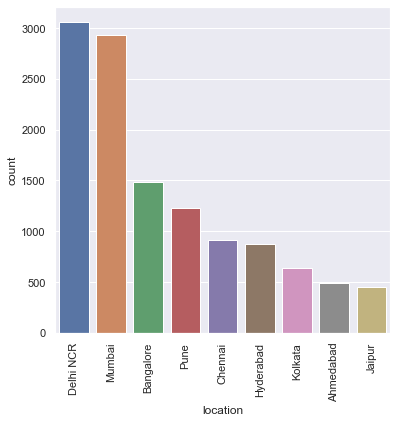

In [23]:
plt.figure(figsize=(6,6))
sns.set(style='darkgrid')
order=df1['location'].value_counts().index
sns.countplot(df1['location'],order=order)
plt.xticks(rotation=90)
print(df1['location'].value_counts())

In [24]:
#Making a function since we repeat this several times
def explore(a):
    plt.figure(figsize=(10,10))
    sns.set(style='darkgrid')
    order=df1[f'{a}'].value_counts().index
    x=sns.countplot(df1[f'{a}'],order=order)
    plt.xticks(rotation=90)
    print('unique values: ',df1[a].nunique())
    print(df1[f'{a}'].value_counts())
    return x

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unique values:  34
Maruti           3225
Hyundai          2392
Honda            1182
Toyota            760
Mahindra          566
Volkswagen        520
Ford              506
Mercedes-Benz     455
Renault           378
BMW               359
Audi              311
Tata              304
Skoda             266
Chevrolet         146
Nissan            134
Land               74
Jaguar             65
Kia                64
Jeep               60
MG                 57
Datsun             56
Volvo              47
Porsche            40
Mini               30
Fiat               30
Mitsubishi         17
Lexus               6
Isuzu               5
Bentley             3
Aston               3
Lamborghini         2
Maserati            2
Force               2
ICML                1
Name: brand, dtype: int64


<AxesSubplot:xlabel='brand', ylabel='count'>

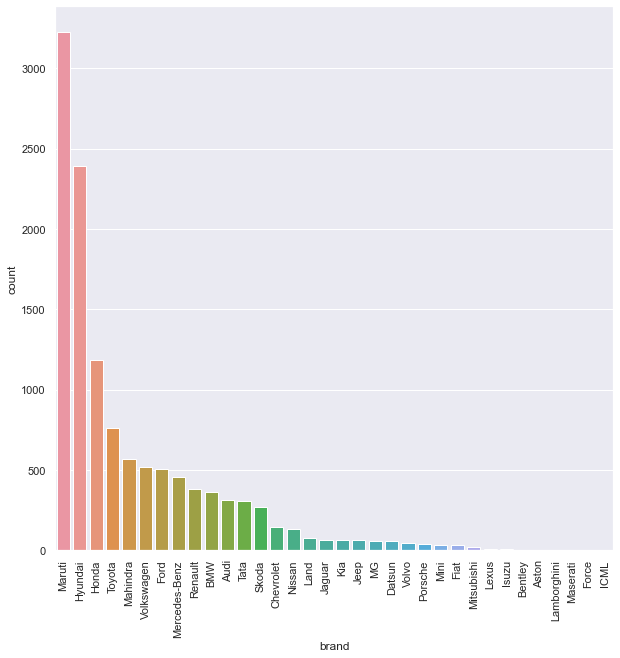

In [25]:
explore('brand')

In [26]:
#Replacing the brand name
df1['brand']=df1['brand'].str.replace('Land','Landrover')
df1['brand']=df1['brand'].str.replace('Mini','Mini Cooper')

We changed the brand names successfully

In [27]:
#Unique brands to a list
car_brands=df1['brand'].unique()
car_brands

array(['Maruti', 'Hyundai', 'Ford', 'Honda', 'Toyota', 'Mahindra',
       'Landrover', 'BMW', 'Mercedes-Benz', 'Nissan', 'Datsun',
       'Volkswagen', 'Jeep', 'Chevrolet', 'Renault', 'Tata', 'Kia',
       'Skoda', 'Audi', 'MG', 'Mitsubishi', 'Fiat', 'Jaguar', 'Volvo',
       'Lexus', 'Mini Cooper', 'Porsche', 'Isuzu', 'Aston', 'Bentley',
       'Force', 'ICML', 'Lamborghini', 'Maserati'], dtype=object)

In [28]:
#Listing premium cars
counts= df1['brand'].value_counts()
premium_cars = df1[df1['brand'].isin(counts[counts < 15].index)]

In [29]:
#viewing premium cars data
premium_cars

,location,brand,model,version,year,fuel_type,transmission_type,distance_driven,price
1081,Hyderabad,Lexus,LS,500h Ultra Luxury,2,Petrol,Automatic,3500,1.69
2720,Delhi NCR,Isuzu,MU 7,4x2,6,Diesel,Manual,99000,13.00
2722,Delhi NCR,Aston,Martin Rapide,V12,9,Petrol,Automatic,20690,87.50
3404,Delhi NCR,Isuzu,D-Max,Standard,2,Diesel,Manual,35000,14.25
3527,Delhi NCR,Lexus,ES,300h Exquisite,1,Petrol,Automatic,12000,57.90
3745,Delhi NCR,Bentley,Continental,GT Speed Convertible,14,Petrol,Automatic,29000,81.00
3885,Delhi NCR,Lexus,ES,300h Luxury,4,Petrol,Automatic,32000,39.50
4118,Delhi NCR,Lexus,NX,300h Luxury,3,Petrol,Automatic,43500,46.00
4431,Delhi NCR,Force,One,4X2 6 Seating,9,Diesel,Manual,50000,3.50
6094,Bangalore,ICML,Rhino Rx,Royale CRDFi 8 Seater BS III,11,Diesel,Manual,110000,1.60


In [30]:
#New data frame without premium cars / models with less data
counts= df1['brand'].value_counts()
df_new = df1[~df1['brand'].isin(counts[counts < 15].index)]
df_new.shape

(12044, 9)

no. of rows removed - 24 very less %.  

In [31]:
#Checking 
df_new['brand'].value_counts()

Maruti           3225
Hyundai          2392
Honda            1182
Toyota            760
Mahindra          566
Volkswagen        520
Ford              506
Mercedes-Benz     455
Renault           378
BMW               359
Audi              311
Tata              304
Skoda             266
Chevrolet         146
Nissan            134
Landrover          74
Jaguar             65
Kia                64
Jeep               60
MG                 57
Datsun             56
Volvo              47
Porsche            40
Mini Cooper        30
Fiat               30
Mitsubishi         17
Name: brand, dtype: int64

Now we made a new data set with data of car brands more than 15

In [32]:
mean_by_brand=df_new.groupby(['brand']).mean()
mean_by_brand

,year,distance_driven,price
brand,,,
Audi,6.855305,62521.456592,20.307846
BMW,6.718663,56468.623955,25.276741
Chevrolet,9.205479,71692.753425,2.564589
Datsun,4.232143,32099.178571,3.073393
Fiat,8.866667,86281.866667,2.787333
Ford,6.294466,63445.306324,7.833478
Honda,6.743655,54343.340948,5.553054
Hyundai,6.645903,54289.276756,5.314835
Jaguar,5.600000,47759.646154,32.317692


from above we can see mean values of year, km driven and price by brand.

<BarContainer object of 12044 artists>

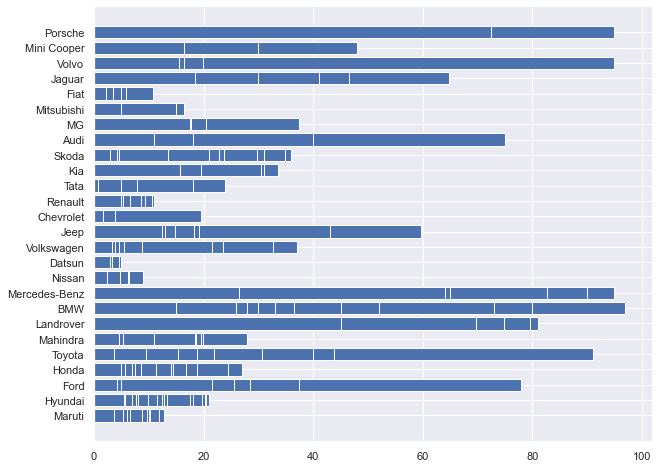

In [33]:
# price with respect to brand
plt.figure(figsize = (10, 8))
plt.barh(df_new['brand'],df_new['price'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unique values:  288
i20                  578
City                 509
Swift                500
Grand i10            470
Wagon R              431
                    ... 
A-Class Limousine      1
Optra Magnum           1
Kiger                  1
Alturas G4             1
Trailblazer            1
Name: model, Length: 288, dtype: int64


<AxesSubplot:xlabel='model', ylabel='count'>

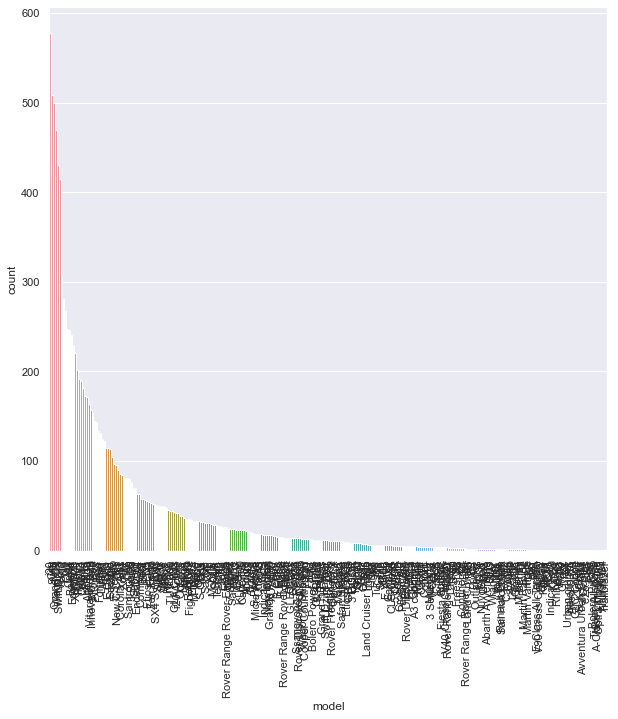

In [34]:
explore('model')

In [35]:
#Dropping the rows of models with data less than 20
counts= df1['model'].value_counts()
df_new = df1[~df1['model'].isin(counts[counts < 20].index)]
df_new.shape

(10993, 9)

In [36]:
10993/12044

0.9127366323480571

9% of data is lost.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unique values:  2129
VXI                 378
VDI                 209
LXI                 209
Sportz              193
Magna               157
                   ... 
GLS AT                1
AT W6 1.99 mHawk      1
1.4 VXD               1
i-VTEC CVT VX         1
Momentum D4 BSIV      1
Name: version, Length: 2129, dtype: int64


<AxesSubplot:xlabel='version', ylabel='count'>

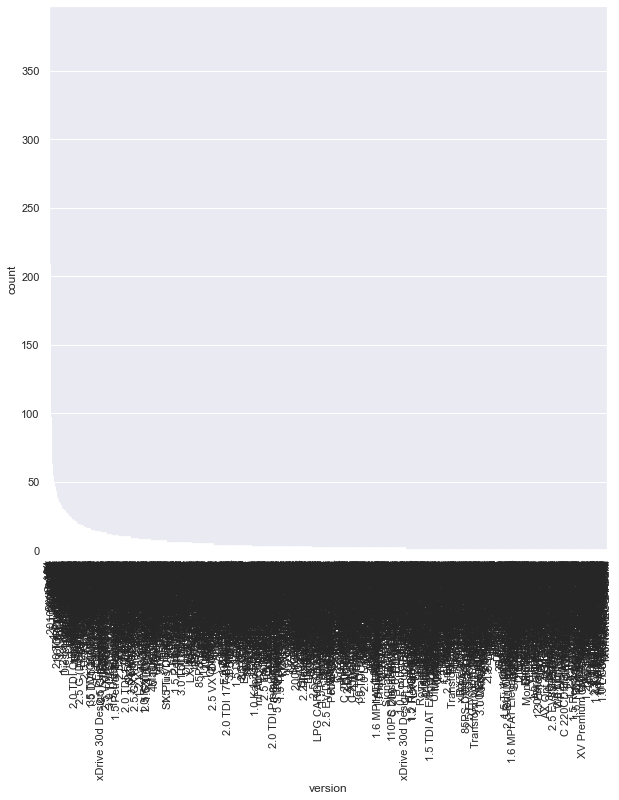

In [37]:
#exploring the column version 
explore('version')

In [38]:
df_new.drop(['version'],axis=1, inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now the column version is dropped

In [39]:
df_new.columns

Index(['location', 'brand', 'model', 'year', 'fuel_type', 'transmission_type',
       'distance_driven', 'price'],
      dtype='object')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unique values:  5
Petrol      6564
Diesel      5334
CNG          130
LPG           29
Electric      11
Name: fuel_type, dtype: int64


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

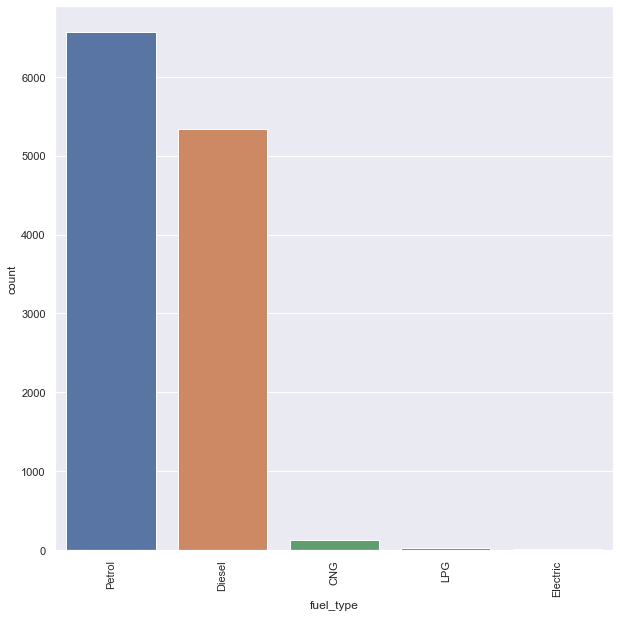

In [40]:
explore('fuel_type')

Majority of data is of  petrol and Diesel Cars

In [41]:
mean_by_fuel=df_new.groupby('fuel_type').mean()
mean_by_fuel

,year,distance_driven,price
fuel_type,,,
CNG,6.277778,60479.666667,3.768016
Diesel,6.301379,70729.658961,10.446471
LPG,11.423077,67726.615385,2.050000
Petrol,6.493144,47892.028730,5.485574


<BarContainer object of 10993 artists>

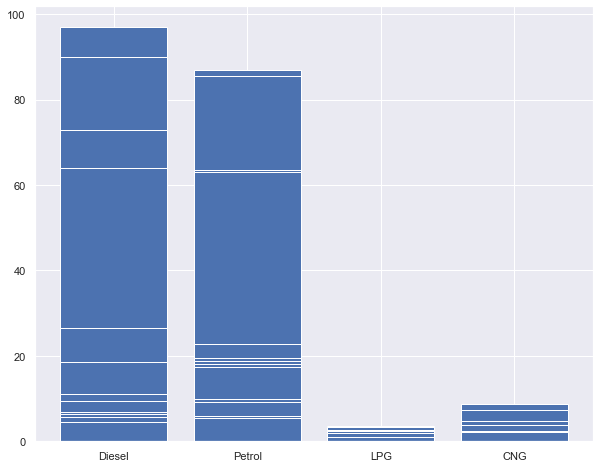

In [42]:
# price with respect to fuel type
plt.figure(figsize = (10, 8))
plt.bar(df_new['fuel_type'],df_new['price'])

Diesel cars are having more cost. LPG are less cost

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


unique values:  2
Manual       8708
Automatic    3360
Name: transmission_type, dtype: int64


<AxesSubplot:xlabel='transmission_type', ylabel='count'>

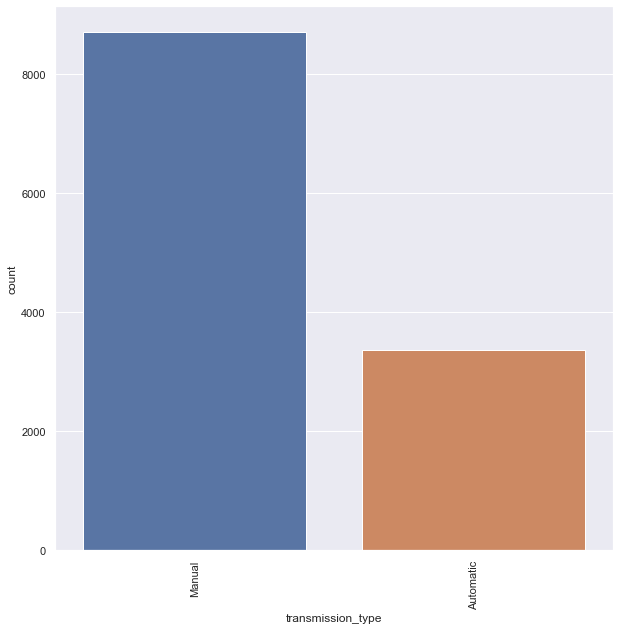

In [43]:
explore('transmission_type')

There are two types of transmissions. Manual and Automatic.

In [44]:
mean_by_transmission=df_new.groupby('transmission_type').mean()
mean_by_transmission

,year,distance_driven,price
transmission_type,,,
Automatic,5.669113,52152.660727,14.443442
Manual,6.684418,59893.902964,5.171649


Automatic have mean price of 14.44 lakhs

<BarContainer object of 10993 artists>

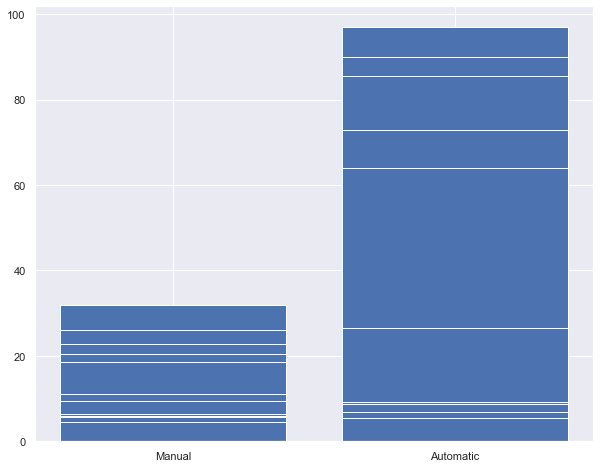

In [45]:
# price with respect to transmission type
plt.figure(figsize = (10, 8))
plt.bar(df_new['transmission_type'],df_new['price'])

Cars of automatic transmisson are more costlier

<BarContainer object of 10993 artists>

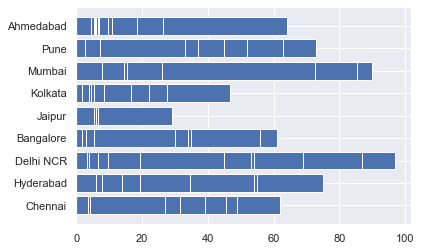

In [46]:
#Prices based on location
plt.barh(df_new['location'],df_new['price'])

<Figure size 720x720 with 0 Axes>

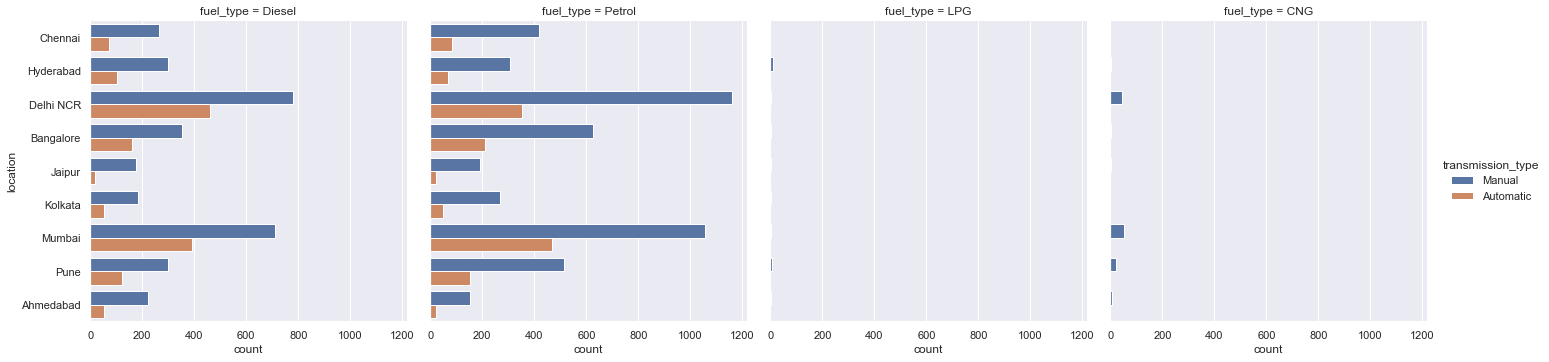

In [47]:
#Number of cars in each city based on type of fuel and transmission
plt.figure(figsize=(10,10))
sns.catplot(y="location", hue="transmission_type", col="fuel_type",
                data=df_new, kind="count")


Exploring the numerical column 

In [48]:
#df_new.dtypes

In [49]:
df_new.describe()

,year,distance_driven,price
count,10993.000000,1.099300e+04,10993.000000
mean,6.420086,5.787849e+04,7.585537
std,3.225992,4.582001e+04,8.041018
min,0.000000,1.010000e+02,0.480000
25%,4.000000,3.400000e+04,3.490000
50%,6.000000,5.400000e+04,5.210000
75%,9.000000,7.500000e+04,8.000000
max,22.000000,2.150000e+06,96.990000


In [50]:
#To show entire number instead of +xx while describe function
pd.options.display.float_format = "{:.2f}".format

In [51]:
df_new.describe()

,year,distance_driven,price
count,10993.00,10993.00,10993.00
mean,6.42,57878.49,7.59
std,3.23,45820.01,8.04
min,0.00,101.00,0.48
25%,4.00,34000.00,3.49
50%,6.00,54000.00,5.21
75%,9.00,75000.00,8.00
max,22.00,2150000.00,96.99


In [52]:
#Pivoting for better views
df_pivot=pd.pivot_table(df_new,index=['brand','fuel_type'], columns=['transmission_type'],values=['price'])
df_pivot

price       
transmission_type       Automatic Manual
brand         fuel_type                 
Audi          Diesel        18.69  23.67
              Petrol        22.99    NaN
BMW           Diesel        23.95    NaN
              Petrol        16.06    NaN
Chevrolet     Diesel         4.52   2.42
              LPG             NaN   1.06
              Petrol          NaN   1.47
Datsun        Petrol         4.00   2.83
Ford          Diesel        25.38   4.86
              Petrol         7.40   4.74
Honda         Diesel        14.10   5.85
              Petrol         6.56   5.02
Hyundai       CNG             NaN   3.11
              Diesel         9.83   5.81
              LPG             NaN   2.53
              Petrol         6.95   4.46
Jaguar        Diesel        23.91    NaN
Jeep          Diesel        27.82  14.81
              Petrol        17.74  13.00
Kia           Diesel        17.26  14.65
              Petrol        17.31  13.68
Landrover     Diesel        31.91    NaN
              Petrol        46.50    NaN
MG            Diesel          NaN  18.52
              Petrol        17.73    NaN
Mahindra      CNG             NaN   4.63
              Diesel        11.37   7.65
              Petrol        18.22   6.51
Maruti        CNG             NaN   3.88
              Diesel         7.98   5.68
              LPG             NaN   1.84
              Petrol         5.34   3.86
Mercedes-Benz Diesel        25.46  10.34
              Petrol        25.33  10.90
Nissan        Diesel         8.90   4.24
              Petrol         4.56   3.45
Porsche       Diesel        45.76    NaN
              Petrol        36.28    NaN
Renault       Diesel         8.32   4.96
              Petrol         4.95   3.86
Skoda         Diesel        10.88   5.09
              Petrol        12.94   6.78
Tata          CNG             NaN   1.68
              Diesel        10.33   4.78
              Petrol         5.88   3.63
Toyota        Diesel        19.67  10.42
              Petrol        10.26   5.26
Volkswagen    Diesel         6.47   4.39
              Petrol         6.57   4.61

Based on brand and fuel type we see the average price 

In [53]:
pd.set_option('display.max_rows', 500)
df_pivot_model=pd.pivot_table(df_new,index=['brand','model','fuel_type'], columns=['location','transmission_type'],values=['price'])
df_pivot_model

price                   \
location                                         Ahmedabad        Bangalore   
transmission_type                                Automatic Manual Automatic   
brand         model                    fuel_type                              
Audi          A4                       Diesel        18.00    NaN     11.00   
                                       Petrol          NaN    NaN       NaN   
              A6                       Diesel        16.90    NaN     25.14   
                                       Petrol          NaN    NaN       NaN   
              Q3                       Diesel        12.25    NaN     23.48   
                                       Petrol          NaN    NaN     29.75   
              Q5                       Diesel        40.00    NaN     22.48   
                                       Petrol          NaN    NaN       NaN   
              Q7                       Diesel        23.00    NaN       NaN   
BMW           3 Series                 Diesel        25.91    NaN     15.25   
                                       Petrol          NaN    NaN      7.50   
              5 Series                 Diesel        14.95    NaN     16.25   
                                       Petrol          NaN    NaN      6.89   
              7 Series                 Diesel          NaN    NaN     15.10   
                                       Petrol          NaN    NaN       NaN   
              X1                       Diesel        21.01    NaN     13.37   
                                       Petrol          NaN    NaN      9.85   
              X3                       Diesel          NaN    NaN     14.50   
                                       Petrol          NaN    NaN       NaN   
              X5                       Diesel          NaN    NaN     34.40   
Chevrolet     Beat                     Diesel          NaN   1.74       NaN   
                                       Petrol          NaN    NaN       NaN   
              Cruze                    Diesel         3.90   3.70      4.95   
              Spark                    LPG             NaN    NaN       NaN   
                                       Petrol          NaN   0.55       NaN   
Datsun        RediGO                   Petrol         4.65   2.92      3.78   
Ford          Ecosport                 Diesel          NaN   5.20       NaN   
                                       Petrol          NaN   5.25      9.46   
              Endeavour                Diesel        22.88    NaN     27.16   
              Fiesta                   Diesel          NaN    NaN       NaN   
                                       Petrol          NaN    NaN       NaN   
              Figo                     Diesel          NaN   2.35       NaN   
                                       Petrol          NaN   1.14       NaN   
              Figo Aspire              Diesel          NaN    NaN       NaN   
                                       Petrol         5.50   5.90       NaN   
Honda         Accord                   Petrol         4.15   4.95      5.25   
              Amaze                    Diesel          NaN   4.07       NaN   
                                       Petrol         5.71   5.25      8.30   
              BR-V                     Diesel          NaN   6.90       NaN   
                                       Petrol          NaN    NaN      8.65   
              Brio                     Petrol         4.50   4.38       NaN   
              CR-V                     Diesel          NaN    NaN       NaN   
                                       Petrol          NaN   2.50     10.40   
              City                     Diesel          NaN   6.26       NaN   
                                       Petrol         5.76   6.69     10.41   
              Civic                    Diesel          NaN    NaN       NaN   
                                       Petrol         1.95   2.88       NaN   
              Jazz      

From above we can see the average price by each model in brand based on fuel and transmission type in different cities

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.4726957214279264


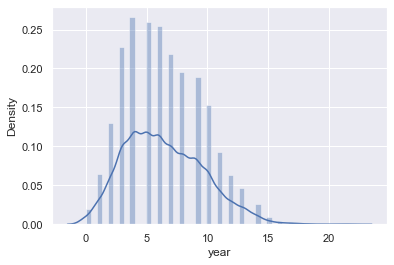

In [54]:
sns.distplot(df_new['year'])
print(df_new['year'].skew())

Skewness in acceptable range

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

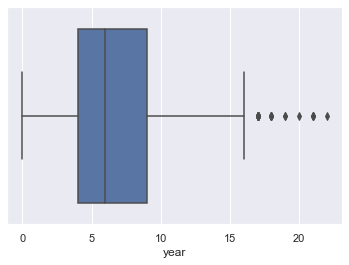

In [55]:
#Year
sns.boxplot(df_new['year'])

Outliers are present

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


16.242334466265692


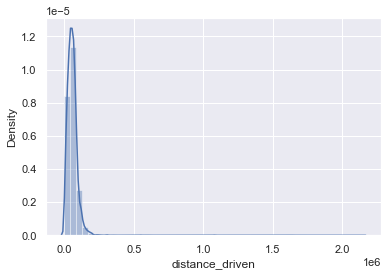

In [56]:
sns.distplot(df_new['distance_driven'])
print(df_new['distance_driven'].skew())

skewness is too high. we need to reduce

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_driven'>

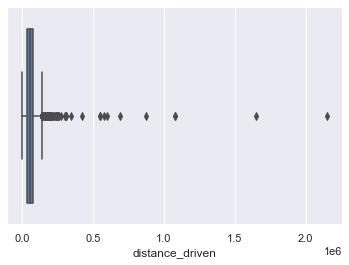

In [57]:
sns.boxplot(df_new['distance_driven'])

There are many outliers

Encoding the categorical columns

In [58]:
df_new.columns

Index(['location', 'brand', 'model', 'year', 'fuel_type', 'transmission_type',
       'distance_driven', 'price'],
      dtype='object')

In [59]:
from sklearn.preprocessing import LabelEncoder
df_encoded=df_new
le=LabelEncoder()
df_encoded['location']=le.fit_transform(df_encoded['location'])
print(df_encoded['location'].value_counts())

3    2799
7    2679
1    1356
8    1111
2     838
4     784
6     559
0     456
5     411
Name: location, dtype: int64


<ipython-input-59-4f4e583cc625>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['location']=le.fit_transform(df_encoded['location'])


Encoding will be done and numbered as per dictionary order

In [60]:
#Encoding Brand
df_encoded['brand']=le.fit_transform(df_encoded['brand'])
print(df_encoded['brand'].value_counts())

13    3116
6     2343
5     1182
20     691
21     500
4      487
12     477
14     362
17     338
1      324
0      273
18     242
19     168
15     112
2      111
8       58
9       50
11      45
3       35
7       31
10      25
16      23
Name: brand, dtype: int64


<ipython-input-60-f985303c3ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['brand']=le.fit_transform(df_encoded['brand'])


In [61]:
#Encoding model
df_encoded['model']=le.fit_transform(df_encoded['model'])
print(df_encoded['model'].value_counts())

104    578
22     509
81     500
44     470
93     431
82     415
90     307
103    281
62     267
21     247
26     246
13     241
31     230
10     220
98     202
48     192
53     189
20     182
88     172
35     171
9      164
91     157
49     154
8      145
50     143
39     134
41     131
28     125
30     122
16     115
29     114
66     113
76     105
7       97
1       96
59      90
94      86
25      84
99      82
5       81
68      81
75      80
86      77
80      70
0       70
34      63
4       63
24      58
14      57
71      56
63      55
37      54
32      53
102     52
85      52
72      51
46      50
77      50
79      50
92      50
89      47
45      45
83      44
36      44
64      43
42      42
105     42
61      39
23      39
60      36
67      35
56      35
11      35
40      34
58      33
18      33
33      33
55      33
70      32
101     32
74      31
97      31
65      31
100     30
57      28
17      28
78      28
96      27
84      27
27      26
38      26

<ipython-input-61-1baf3b82f567>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['model']=le.fit_transform(df_encoded['model'])


In [62]:
#Encoding fuel type
df_encoded['fuel_type']=le.fit_transform(df_encoded['fuel_type'])
print(df_encoded['fuel_type'].value_counts())

3    6126
1    4715
0     126
2      26
Name: fuel_type, dtype: int64


<ipython-input-62-06b3f9be0cf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['fuel_type']=le.fit_transform(df_encoded['fuel_type'])


In [63]:
#Encoding transmission type
df_encoded['transmission_type']=le.fit_transform(df_encoded['transmission_type'])
print(df_encoded['transmission_type'].value_counts())

1    8131
0    2862
Name: transmission_type, dtype: int64


<ipython-input-63-5a7b41202f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['transmission_type']=le.fit_transform(df_encoded['transmission_type'])


In [64]:
#Removing outliers
import scipy
from scipy.stats import zscore

In [65]:
df_new.shape

(10993, 8)

In [66]:
b=abs(zscore(df_encoded))
x=df_encoded[(b<3).all(axis=1)]
x.shape

(10666, 8)

In [67]:
outliers removed

SyntaxError: invalid syntax (<ipython-input-67-e9e805ea381e>, line 1)

In [ ]:
1-(10666/10993)

3% of data is lost after removing outliers acceptable

In [ ]:
1-(10666/12070)

Total data loss from original dataset to till now : 11.6% 

In [74]:
#Let us see skewness now
df_encoded.skew()

location             0.02
brand                0.16
model                0.01
year                 0.47
fuel_type           -0.28
transmission_type   -1.09
distance_driven     16.24
price                3.73
dtype: float64

skewness is to be considered only for distance, remaining all categorical columns, 

In [75]:
df_encoded['distance_driven'].describe()

count     10993.00
mean      57878.49
std       45820.01
min         101.00
25%       34000.00
50%       54000.00
75%       75000.00
max     2150000.00
Name: distance_driven, dtype: float64

In [76]:
#Reducing skewness in column distance_driven - log transormation
df_encoded['distance_driven']=np.log(df_encoded['distance_driven'])

<ipython-input-76-88de75b725af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['distance_driven']=np.log(df_encoded['distance_driven'])


In [77]:
df_encoded['distance_driven'].skew()

-1.4945608827190497

reduced to -1.5 from 16.24

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance_driven', ylabel='Density'>

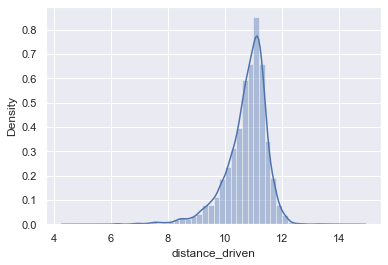

In [78]:
sns.distplot(df_encoded['distance_driven'])

better compared to earlier

In [79]:
#Let us see the correlatio
cor=df_encoded.corr()
cor

,location,brand,model,year,fuel_type,transmission_type,distance_driven,price
location,1.00,0.01,0.02,0.06,0.02,-0.04,-0.03,-0.02
brand,0.01,1.00,0.10,-0.04,-0.06,0.12,0.05,-0.08
model,0.02,0.10,1.00,0.05,-0.04,0.13,0.04,-0.11
year,0.06,-0.04,0.05,1.00,0.03,0.14,0.52,-0.36
fuel_type,0.02,-0.06,-0.04,0.03,1.00,0.06,-0.30,-0.28
transmission_type,-0.04,0.12,0.13,0.14,0.06,1.00,0.12,-0.51
distance_driven,-0.03,0.05,0.04,0.52,-0.30,0.12,1.00,-0.20
price,-0.02,-0.08,-0.11,-0.36,-0.28,-0.51,-0.20,1.00


<AxesSubplot:>

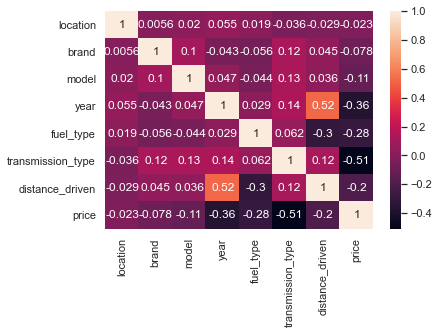

In [80]:
#Viewing the correlation
sns.heatmap(cor, annot=True)

In [81]:
#Splitting the target from features
x=df_encoded.drop('price',axis=1)
y=df_encoded['price']

In [82]:
print('x:',x.shape)
print('y:',y.shape)

x: (10993, 7)
y: (10993,)


Let us scale the the x variables

In [83]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled=scale.fit_transform(x)

In [84]:
x_scaled

array([[-0.93072007,  0.43754549, -0.63226132, ..., -1.09405442,
         0.59328427,  0.4385786 ],
       [-0.93072007,  0.43754549,  1.17198348, ...,  0.885363  ,
        -1.68553264, -0.64214083],
       [-0.93072007, -0.78662419,  1.07866048, ..., -1.09405442,
         0.59328427, -0.27688068],
       ...,
       [-1.72914417,  0.43754549, -0.63226132, ..., -1.09405442,
         0.59328427,  1.27705834],
       [-1.72914417, -0.78662419, -0.3522923 , ...,  0.885363  ,
        -1.68553264,  1.03067586],
       [-1.72914417,  0.2626641 ,  0.64315311, ..., -1.09405442,
         0.59328427,  0.88829564]])

Now we can make the model

Target variable is continuous , so we use regression models

In [85]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [86]:
#Splitting into train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=45)

In [87]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8244, 7) (2749, 7) (8244,) (2749,)


In [88]:
from sklearn.model_selection import cross_val_score
ml_models=[LinearRegression(),SVR(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in ml_models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    mse=mean_squared_error(y_test,predm)
    mae=mean_absolute_error(y_test,predm)
    r2=r2_score(y_test,predm)
    print(f'metrics of {m}:')
    print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')
    score=cross_val_score(m,x_scaled,y, cv=5)
    print(' mean cv score:',score.mean())
    print('\n\n')

metrics of LinearRegression():
 mean_absolute_error: 3.8183894948676045
 mean_squared_error: 42.690310110761274
 r2_score: 0.413367102816257 
 mean cv score: 0.38477066252901365



metrics of SVR():
 mean_absolute_error: 2.611479700854225
 mean_squared_error: 34.1094426112222
 r2_score: 0.5312818977321063 
 mean cv score: 0.5216519097238044



metrics of RandomForestRegressor():
 mean_absolute_error: 1.112262082960615
 mean_squared_error: 8.705817964392041
 r2_score: 0.8803681865614232 
 mean cv score: 0.8324849113830514



metrics of GradientBoostingRegressor():
 mean_absolute_error: 2.039543241996687
 mean_squared_error: 16.038926716267586
 r2_score: 0.7795995854124751 
 mean cv score: 0.7611051261004758





Gradient boosting has the less difference between mean cv score and r2 score.

In [89]:
#Makikng the model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 2.039743226807662
 mean_squared_error: 16.043453067281668
 r2_score: 0.7795373861358201 


The accuracy of predicted price is 80%

In [90]:
print('Train score:',gbr.score(x_train,y_train))
print('Test score:',gbr.score(x_test,y_test))

Train score: 0.8066404655827591
Test score: 0.7795373861358201


Train and test score are nerly equal.So no overfitting

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

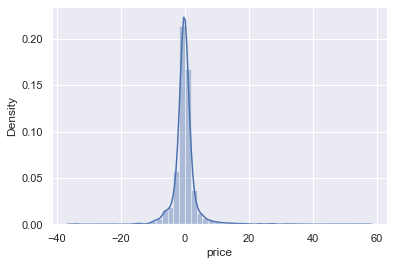

In [91]:
#Distribution plot for difference between original and predicted price
sns.distplot(y_test-pred)

The graph is normally distributed

In [ ]:
#Tuning
from sklearn.model_selection import GridSearchCV
par={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
     'n_estimators':range(100,1000,100),
     'min_samples_split':range(2,10,2),
     'min_samples_leaf':range(1,10)
    }
grid=GridSearchCV(gbr,param_grid=par, cv=5,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)



Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END loss=squared_error, min_samples_leaf=1, min_samples_split=2, n_estimat

Now we got the best parameters.

In [93]:
gbr_tuned=GradientBoostingRegressor(min_samples_split=8, n_estimators=900,min_samples_leaf=1,loss='squared_error')
gbr_tuned.fit(x_train,y_train)
pred=gbr_tuned.predict(x_test)
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print(f' mean_absolute_error: {mae}\n mean_squared_error: {mse}\n r2_score: {r2} ')

 mean_absolute_error: 1.1809010583066206
 mean_squared_error: 7.009814973977932
 r2_score: 0.903673970598071 


The accuracy improved from 78% to 90%

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

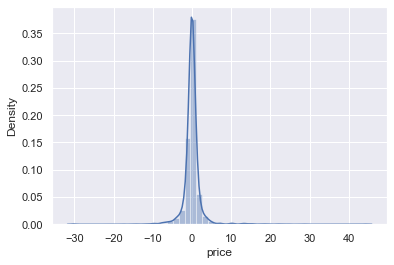

In [94]:
sns.distplot(y_test-pred)

It is normally distributed

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

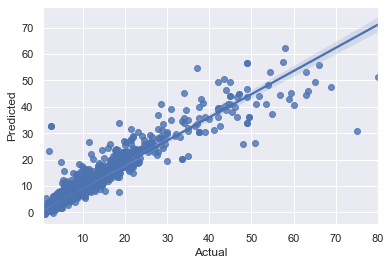

In [95]:
results=pd.DataFrame({'Actual':y_test, 'Predicted':pred})
sns.regplot(x='Actual',y='Predicted',data=results)

From above we can see, the predicted values are more deviated for high cost cars

In [96]:
results.sample(10)

,Actual,Predicted
2555,4.65,5.17
2345,1.20,1.15
11428,1.50,1.76
3272,2.85,2.99
6698,4.96,4.71
1522,7.95,10.36
4517,4.75,4.97
634,2.15,2.24
676,2.25,3.90
1036,3.10,3.69


In [97]:
#Saving the model as obj file
import pickle
file=open('car_price_prediction.pkl','wb')
pickle.dump(gbr_tuned,file)